# Loss Plots

In [1]:
# Import packages
import os
import pandas as pd
import matplotlib.pyplot as plt 

# Define names of training combinations
individual_trainings = ["Cv", "homo", "lumo", "zpve"]
combined_trainings = ["Cv_zpve", "homo_lumo"]
TL_trainings = ["TL_Cv_zpve", "TL_homo_lumo", "TL_lumo_homo", "TL_zpve_Cv"]
TLF_trainings = ["TLF_Cv_zpve", "TLF_homo_lumo", "TLF_lumo_homo", "TLF_zpve_Cv"]
all_trainings = [individual_trainings, combined_trainings, TL_trainings, TLF_trainings]

# Define paths to data
path_val_loss = os.path.join(os.getcwd(), "validation_loss")
path_train_loss = os.path.join(os.getcwd(), "training_loss")

In [2]:
# Define DTU colors
DTU_red = '#990000'
DTU_black = '#000000'
DTU_navy = '#030F4F'
DTU_light_green = '#1FD082'
DTU_blue = '#2F3EEA'
DTU_yellow = '#F6D04D'
DTU_orange = '#FC7634'
DTU_green = '#008835'
DTU_purple = '#79238E'

# Use latex font
plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rc('text', usetex=True)

## Define plotting functions

In [3]:
# Create function to load data from csv
def load_data(model: str, base_path: str) -> pd.core.frame.DataFrame:
    """
    Gets the data frame for the training/validation loss for the given model
        args:
            model: name of the model
            base_path: path to the folder containing the loss data
        returns:
            df: pandas data frame for the training/validation loss
    """
    file = base_path+"/"+model+".csv"
    df = pd.read_csv(file)
    return df

def load_data_frames(model: str, base_paths: tuple[str]) -> pd.core.frame.DataFrame:
    df_train = load_data(model, base_paths[0])
    df_val = load_data(model, base_paths[1])
    return df_train, df_val

# Create function to plot for single training
def plot_training(model: str, base_paths: tuple[str]) -> None:
    """
    Plots training and validation loss of the given model
        args:
            model: name of the model
            base_paths: paths to the folders containing the loss data as tuple (train_loss, val_loss)    
    """
    # Load data frames
    df_train = load_data(model, base_paths[0])
    df_val = load_data(model, base_paths[1])

    # Create  plot
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(model)
    ax1.plot(df_train['Step'], df_train['Value'], color=DTU_black)
    ax1.set_title('Training Loss')
    ax2.plot(df_val['Step'], df_val['Value'], color=DTU_black)
    ax2.set_title('Validation Loss')
    # ax1.set(xlabel='Steps', ylabel='Value')
    # ax2.set(xlabel='Steps', ylabel='Value')
    
# plot_training(TL_trainings[0],(path_train_loss, path_val_loss))

In [64]:
from matplotlib.lines import Line2D
# Function to plot all training and validation on top of each other
def plot_everything(trainings: list, base_paths: tuple[str]) -> None:

    legend_labels = []
    training_names = ['individual_trainings', 'combined_trainings', 'TL_trainings', 'TLF_trainings']
    colors = [DTU_red, DTU_blue, DTU_green, DTU_black, DTU_purple]
    
    # Initialize figure
    fig, (ax1, ax2) = plt.subplots(1,2)
    
    fig.suptitle(r'\textbf{All models}', fontweight='bold', fontsize=16)
    ax1.set_title('Training Loss')
    # ax1.set_ylim([0, 0.15])
    ax2.set_title('Validation Loss')
    # ax2.set_ylim([0, 0.08])
    ax1.set_xlabel('Steps')
    ax1.set_ylabel('MSE')
    ax2.set_xlabel('Steps')
    ax2.set_ylabel('MSE')

    ax1.set_yscale('log')
    ax2.set_yscale('log')

    ax1.grid(True, linestyle='--', color='lightgrey')
    ax2.grid(True, linestyle='--', color='lightgrey')

    for idx, training in enumerate(trainings):

        legend_labels.append(training_names[idx])
        plot_color = colors[idx]
        
        for model in training:
            # Load data frames
            df_train = load_data(model, base_paths[0])
            df_val = load_data(model, base_paths[1])

            # Plot data
            ax1.plot(df_train['Step'], df_train['Value'], color=plot_color, linewidth=0.3)
            ax2.plot(df_val['Step'], df_val['Value'], color=plot_color)  
   
        # legend = plt.legend(legend_labels, bbox_to_anchor=(0.5, -0.4), loc='upper center', fancybox=False, shadow=False, ncol=len(legend_labels))
         # Create custom legend handles with Line2D objects
    legend_handles = [Line2D([0], [0], color=color, label=label) for color, label in zip(colors, legend_labels)]

    # Create legend with custom handles
    legend = ax2.legend(handles=legend_handles, bbox_to_anchor=(-0.25, -0.25), loc='lower center', fancybox=True, shadow=False, ncol=len(legend_labels))
    plt.subplots_adjust(bottom=0.2, wspace=0.4, hspace=0.7)  # Adjust the bottom margin to make room for the legend     

# plot_everything(all_trainings, (path_train_loss, path_val_loss))     

In [7]:
# Function to plot based on property
def plot_property(trainings: list, base_paths: tuple[str], property: str) -> None:

    len_p = len(property)
    # ylim1, ylim2 = set_axes_property(property)
    title = f'All models for {property}'
    # Initialize figure
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.suptitle(r'\textbf{' + title + '}', fontweight='bold', fontsize=16 )
    ax1.set_title('Training Loss')
    # ax1.set_ylim(ylim1)
    ax2.set_title('Validation Loss')
    # ax2.set_ylim(ylim2)
    ax1.set_xlabel('Steps')
    ax1.set_ylabel('MSE')
    ax2.set_xlabel('Steps')
    ax2.set_ylabel('MSE')

    ax1.set_yscale('log')
    ax2.set_yscale('log')

    ax1.grid(True, linestyle='--', color='lightgrey')
    ax2.grid(True, linestyle='--', color='lightgrey')
    

    colors = [DTU_black, DTU_red, DTU_blue, DTU_green]
    legend_labels = []

    for training in trainings:
        for model in training:
            # Only do for correct property
            model, color = get_model_def(model, property, len_p, colors)
            if model:
                legend_labels.append(model)
                # Load data frames
                df_train, df_val = load_data_frames(model, base_paths)
                
                # Plot data
                ax1.plot(df_train['Step'], df_train['Value'], color=color, linewidth=0.3)
                ax2.plot(df_val['Step'], df_val['Value'], color=color)

    legend = plt.legend(legend_labels, bbox_to_anchor=(-0.25, -0.15), loc='upper center', fancybox=False, shadow=False, ncol=len(legend_labels))
    plt.subplots_adjust(bottom=0.2, wspace=0.4, hspace=0.7)  # Adjust the bottom margin to make room for the legend

def set_axes_property(property: str) -> tuple[list, list]:
    if property == "Cv":
        return [0, 0.15], [0, 0.2]
    elif property == "homo":
        return [0, 0.005], [0, 0.003]
    elif property == "lumo":
        return [0, 0.005], [0, 0.003]
    elif property == "zpve":
        return [0, 1.5], [0, 2]

def get_model_def(model: str, property: str, len_p: int, colors: list) -> tuple[str, str]:
    relevant_model = None
    color = None
    if (model==property):
        relevant_model = model
        color = colors[0]
    elif (model[:(len_p)] == property):                
        relevant_model = model
        color = colors[1]
    elif (model[-len_p:] == property and model[0] != "T"):                
        relevant_model = model
        color = colors[1]
    elif (model[:3] == "TL_") and (model[-len_p:] == property):  #model[:(3+len_p)] == "TL_"+property:                
        relevant_model = model
        color = colors[2]
    elif (model[:4] == "TLF_") and (model[-len_p:] == property): #model[:(4+len_p)] == "TLF_"+property:                
        relevant_model = model
        color = colors[3]   
    return relevant_model, color

# plot_property(all_trainings, (path_train_loss, path_val_loss), "Cv")

In [60]:
# Function to plot for all training types
def plot_training_type(training_name: str, trainings: list, base_paths: tuple[str]) -> None:

    legend_labels = []
    colors = [DTU_red, DTU_blue, DTU_green, DTU_black, DTU_purple]
    title = f'All models for {training_name}'

    # Initialize figure
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.suptitle(r'\textbf{' + title + '}', fontweight='bold', fontsize=16)
    ax1.set_title('Training Loss')
    ax2.set_title('Validation Loss')

    ax1.set_xlabel('Steps')
    ax1.set_ylabel('MSE')
    ax2.set_xlabel('Steps')
    ax2.set_ylabel('MSE')

    ax1.set_yscale('log')
    ax2.set_yscale('log')

    ax1.grid(True, linestyle='--', color='lightgrey')
    ax2.grid(True, linestyle='--', color='lightgrey')

    models = get_relevant_models(training_name, trainings)

    for idx, model in enumerate(models):
        legend_labels.append(model)
        
        # Load data frames
        df_train, df_val = load_data_frames(model, base_paths)
        
        # Plot data
        ax1.plot(df_train['Step'], df_train['Value'], color=colors[idx], linewidth=0.3)
        ax2.plot(df_val['Step'], df_val['Value'], color=colors[idx])

    legend = plt.legend(legend_labels, bbox_to_anchor=(-0.25, -0.15), loc='upper center', fancybox=True, shadow=False, ncol=len(legend_labels))
    plt.subplots_adjust(bottom=0.2, wspace=0.4, hspace=0.7)  # Adjust the bottom margin to make room for the legend
    
def get_relevant_models(training_name: str, trainings: list) -> list:
    
    if training_name == 'individual_trainings':
        models = trainings[0]
    elif training_name == 'combined_trainings':
        models = trainings[1]
    elif training_name == 'TL_trainings':
        models = trainings[2]
    elif training_name == 'TLF_trainings':
        models = trainings[3]

    return models

# plot_training_type('individual_trainings', all_trainings, (path_train_loss, path_val_loss))  

# Do the plots

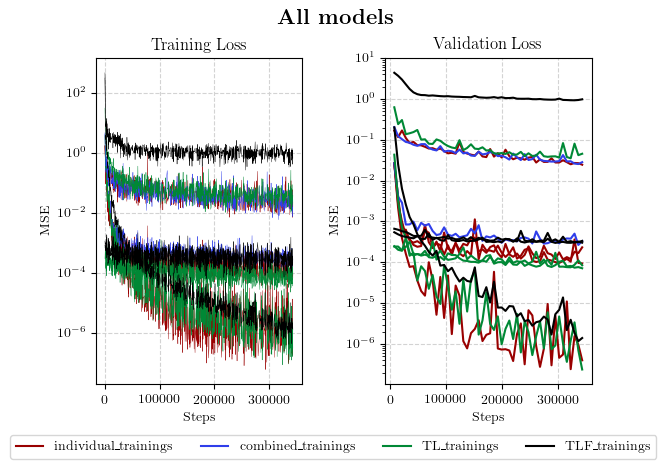

In [61]:
# Plot all models on top of each other
plot_everything(all_trainings, (path_train_loss, path_val_loss))    
# save as pdf
plt.savefig('plot_all_models.pdf')      

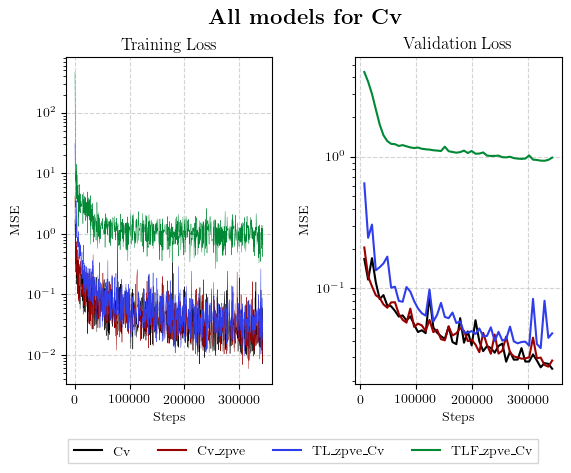

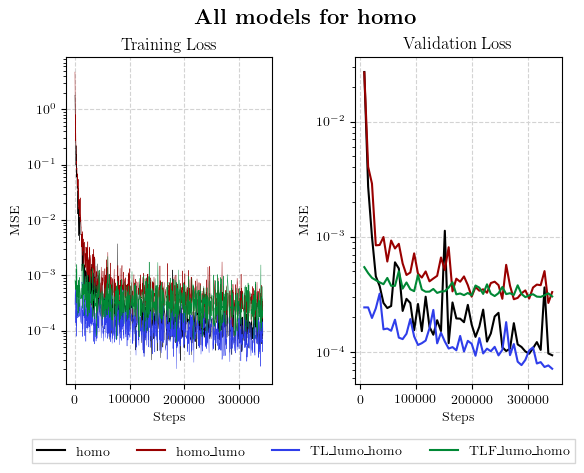

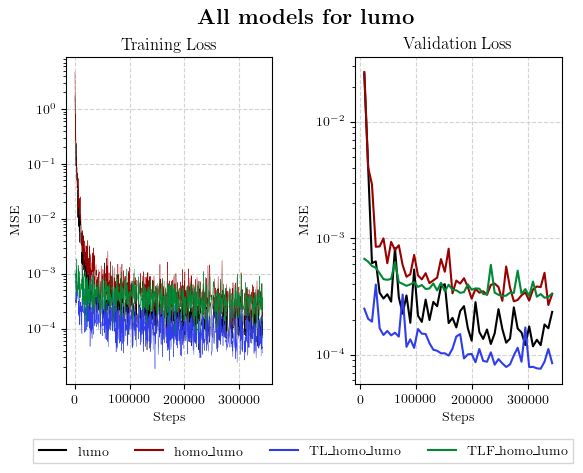

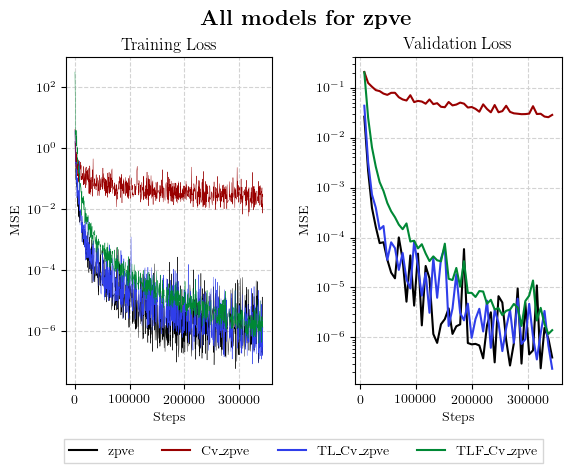

In [8]:
# Plot all models with respect to property
properties = ["Cv", "homo", "lumo", "zpve"]

for property in properties:
    plot_property(all_trainings, (path_train_loss, path_val_loss), property)               

    # save as pdf
    plt.savefig(f'plot_{property}.pdf')

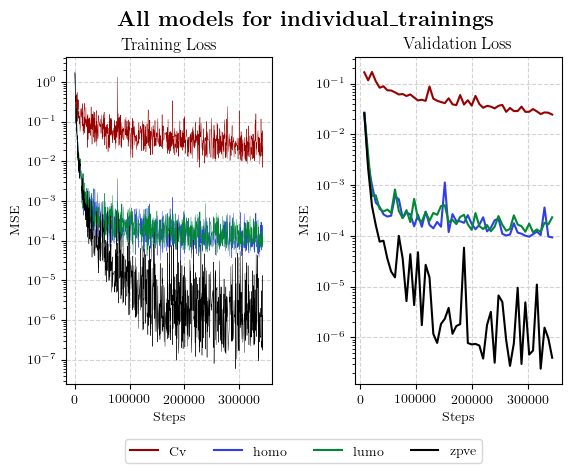

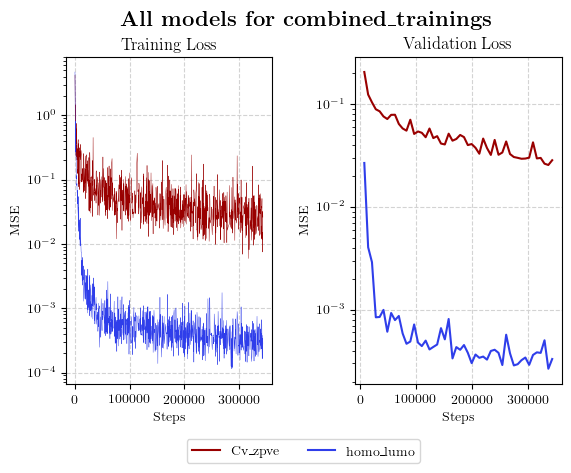

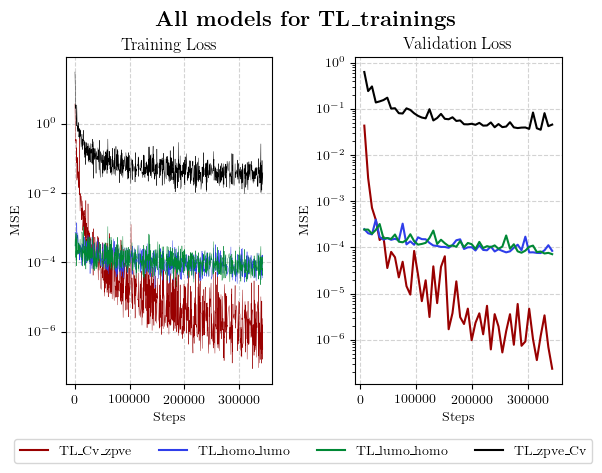

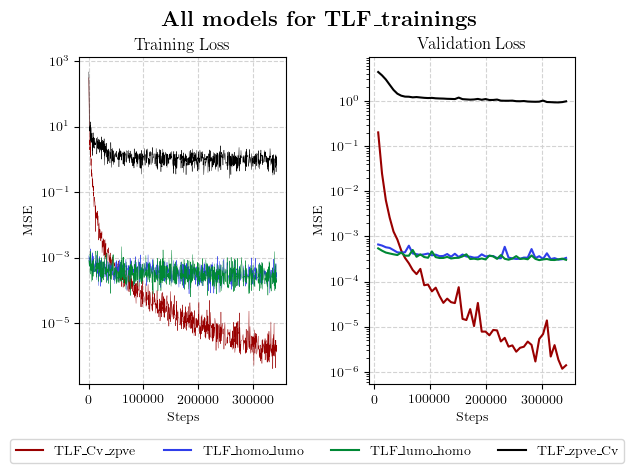

In [63]:
# Make plots for all training types
training_names = ['individual_trainings', 'combined_trainings', 'TL_trainings', 'TLF_trainings']

for training in training_names:
    plot_training_type(training, all_trainings, (path_train_loss, path_val_loss))               

    # save as pdf
    plt.savefig(f'plot_{training}.pdf')